# Assignment 2

This notebook contains the work for Assignment 2.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Data Loading

Load your dataset below.

In [4]:
# Example: Load data (update the filename as needed)
df = pd.read_csv("code/LC_DS_cleaned.csv")
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,male,Sweden,2016-04-05,Stage I,1,passive smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,female,Netherlands,2023-04-20,Stage III,1,passive smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,female,Hungary,2023-04-05,Stage III,1,former smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,female,Belgium,2016-02-05,Stage I,0,passive smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,male,Luxembourg,2023-11-29,Stage I,0,passive smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


## Algorithms and Visualizations

Apply machine learning algorithms and create visualizations below.

Accuracy: 0.5019


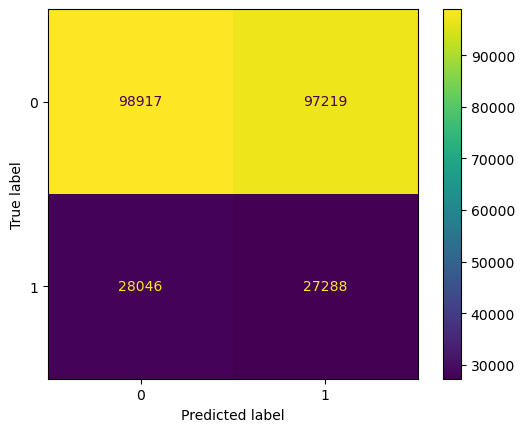

In [5]:
# Algorithm 1: Logistic Regression

# Feature selection
X = df[["age", "bmi", "cholesterol_level", "hypertension", "asthma", "cirrhosis"]]
y = df["survived"]

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Show confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [8]:
# Algorithm 2: Naive Bayesfrom sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)





GaussianNB()

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7799578478546149

Confusion Matrix:
 [[196136      0]
 [ 55334      0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    196136
           1       0.00      0.00      0.00     55334

    accuracy                           0.78    251470
   macro avg       0.39      0.50      0.44    251470
weighted avg       0.61      0.78      0.68    251470



c:\Users\jmsth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jmsth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jmsth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


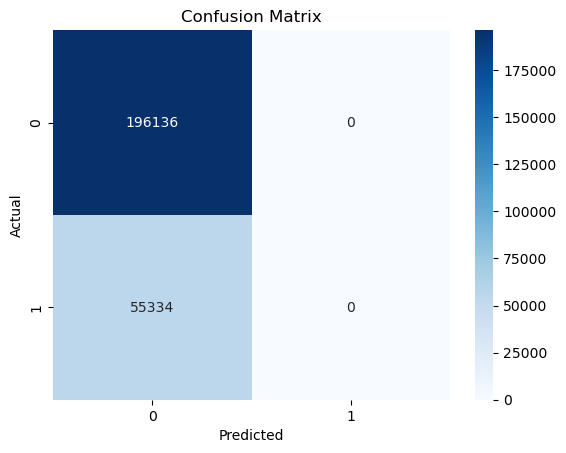

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.3498946196365372

Confusion Matrix:
 [[ 45476 150660]
 [ 12822  42512]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.23      0.36    196136
           1       0.22      0.77      0.34     55334

    accuracy                           0.35    251470
   macro avg       0.50      0.50      0.35    251470
weighted avg       0.66      0.35      0.35    251470

Decision Tree Rules (Text Format):

|--- bmi <= 35.15
|   |--- age <= 49.50
|   |   |--- bmi <= 16.55
|   |   |   |--- bmi <= 16.25
|   |   |   |   |--- class: 1
|   |   |   |--- bmi >  16.25
|   |   |   |   |--- class: 0
|   |   |--- bmi >  16.55
|   |   |   |--- age <= 47.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  47.50
|   |   |   |   |--- class: 0
|   |--- age >  49.50
|   |   |--- cholesterol_level <= 295.50
|   |   |   |--- cholesterol_level <= 282.50
|   |   |   |   |--- class: 1
|   |   |   |--- cholesterol_level >  282.50
|   |   |   |

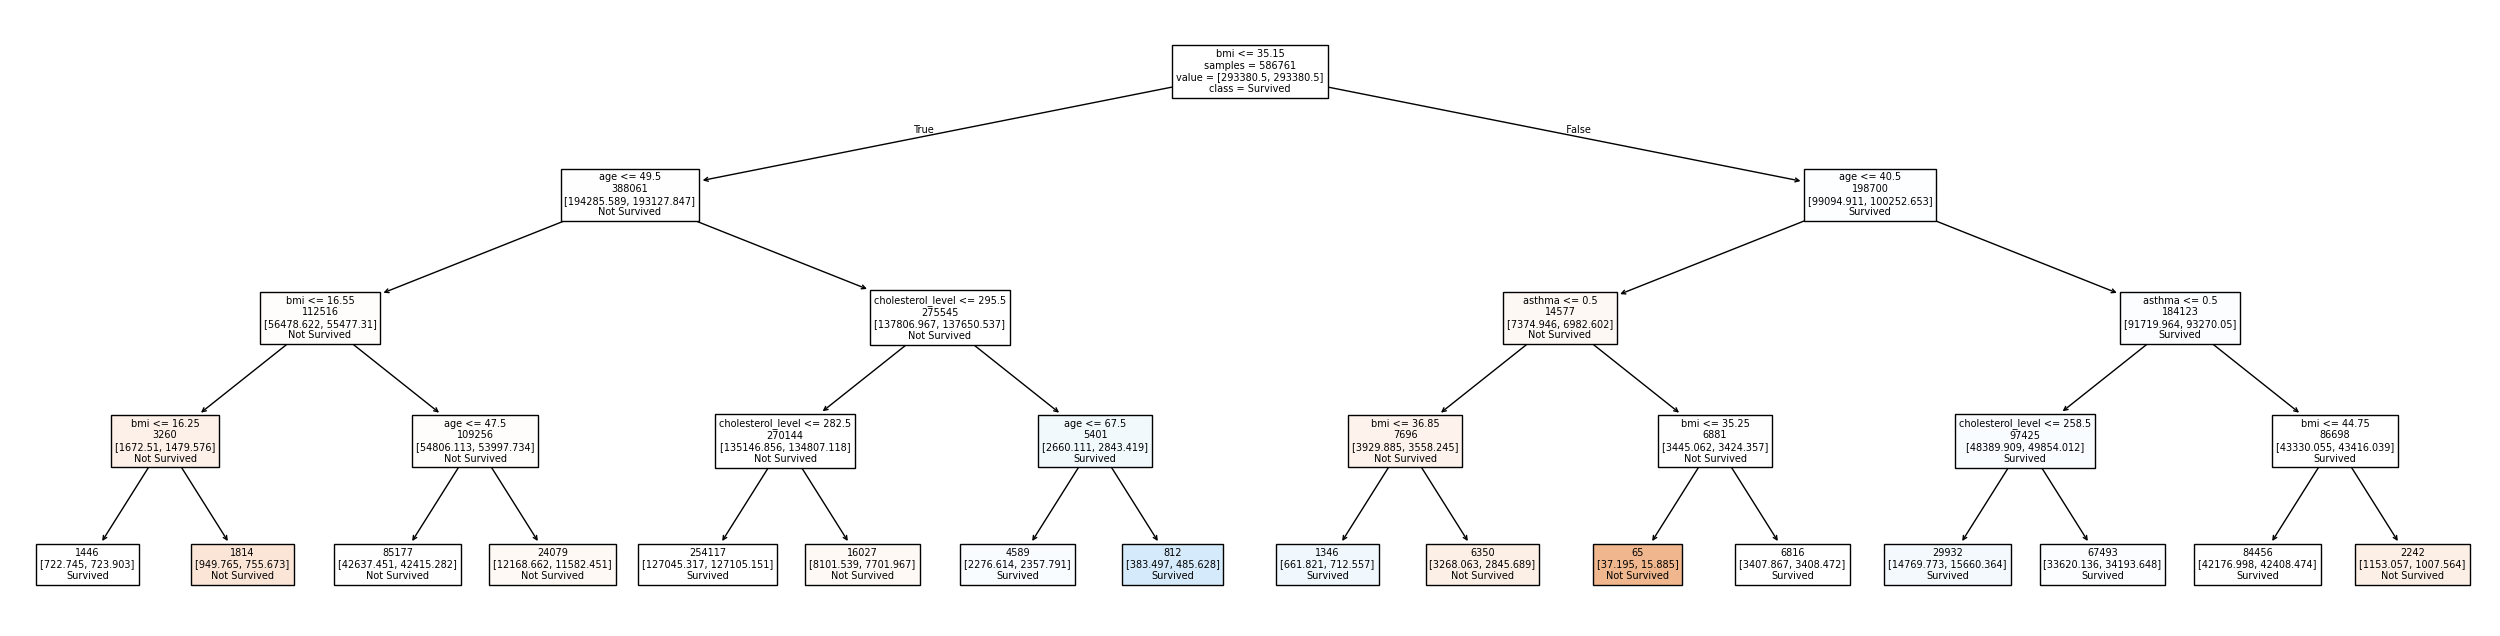

In [ ]:
# Algorithm 3: Decision Tree
# Source: https://www.geeksforgeeks.org/decision-tree-introduction-example/

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import tree
import matplotlib.pyplot as plt

# Initialize + train the decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42, class_weight="balanced")
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Print readable tree rules as text
print("Decision Tree Rules (Text Format):\n")
print(export_text(dt_model, feature_names=list(X.columns)))

# Visualize the decision tree with custom options
feature_names = list(X.columns)
class_names = ["Not Survived", "Survived"]

print("\nDecision Tree:\n")
fig, ax = plt.subplots(figsize=(32, 8))
tree.plot_tree(
    dt_model,                   # trained data
    feature_names=feature_names,  
    class_names=class_names,     
    filled=True,
    impurity=False,        # removes Gini/entropy values
    proportion=False,      # removes proportion of samples
    label='root',          # shows only feature and class at root, feature at splits, class at leaves
    node_ids=False,        # removes node IDs
)
plt.show()